In [1]:
# 数据读取及基本处理
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号'-'显示为方块的问题

In [2]:
df1=pd.read_csv("D:\\AD\\体检 生化·流水线.csv")
df1.head()

,报告单元,样本日期,样本号,年龄,性别,临床诊断,科室,就诊卡号,病历号,ALT,...,TIBC,TSAT,D3H,NT-proBNP,HP,RBP,SAA,CalUTP,CalUCl,N-AMY
0,生化·流水线,2022/11/29,9999999,32岁8月,男,NaN,体检中心,90000136,90000136,157.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,生化·流水线,2023/01/15,500,31岁9月,男,NaN,体检中心,90000160,90000160,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,生化·流水线,2023/02/02,837,48岁10月,女,一般性医学检查,体检中心,522423197403171528,522423197403171528,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,生化·流水线,2023/02/02,840,49岁11月,女,一般性医学检查,体检中心,520112197302192226,520112197302192226,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,生化·流水线,2023/02/02,854,60岁6月,男,一般性医学检查,体检中心,522225196207086614,522225196207086614,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df2=pd.read_csv("D:\\AD\\体检 生化·综合项目.csv")
df2.head()

,报告单元,样本日期,样本号,年龄,性别,临床诊断,科室,就诊卡号,病历号,ALT,...,Fe.1,UIBC,TIBC,TSAT,D3H,NT-proBNP,RBP,SAA,HP,CalUCl
0,生化·综合项目,2022/01/05,73,23岁,女,NaN,体检中心,NaN,NaN,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,生化·综合项目,2022/02/16,36,29岁,女,NaN,体检中心,NaN,NaN,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,生化·综合项目,2022/02/16,37,26岁,女,NaN,体检中心,NaN,NaN,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,生化·综合项目,2022/02/16,38,35岁,女,NaN,体检中心,NaN,NaN,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,生化·综合项目,2022/02/16,39,26岁,女,NaN,体检中心,NaN,NaN,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#缺失值探索
df1.isnull().sum()

报告单元         0
样本日期         0
样本号          0
年龄           0
性别           0
          ... 
RBP       8021
SAA       8021
CalUTP    8021
CalUCl    8021
N-AMY     8021
Length: 109, dtype: int64

In [5]:
#计算缺失值占百分比
miss_value=((df1.isnull().sum())/len(df1))*100
print(miss_value.round(2))

报告单元        0.0
样本日期        0.0
样本号         0.0
年龄          0.0
性别          0.0
          ...  
RBP       100.0
SAA       100.0
CalUTP    100.0
CalUCl    100.0
N-AMY     100.0
Length: 109, dtype: float64


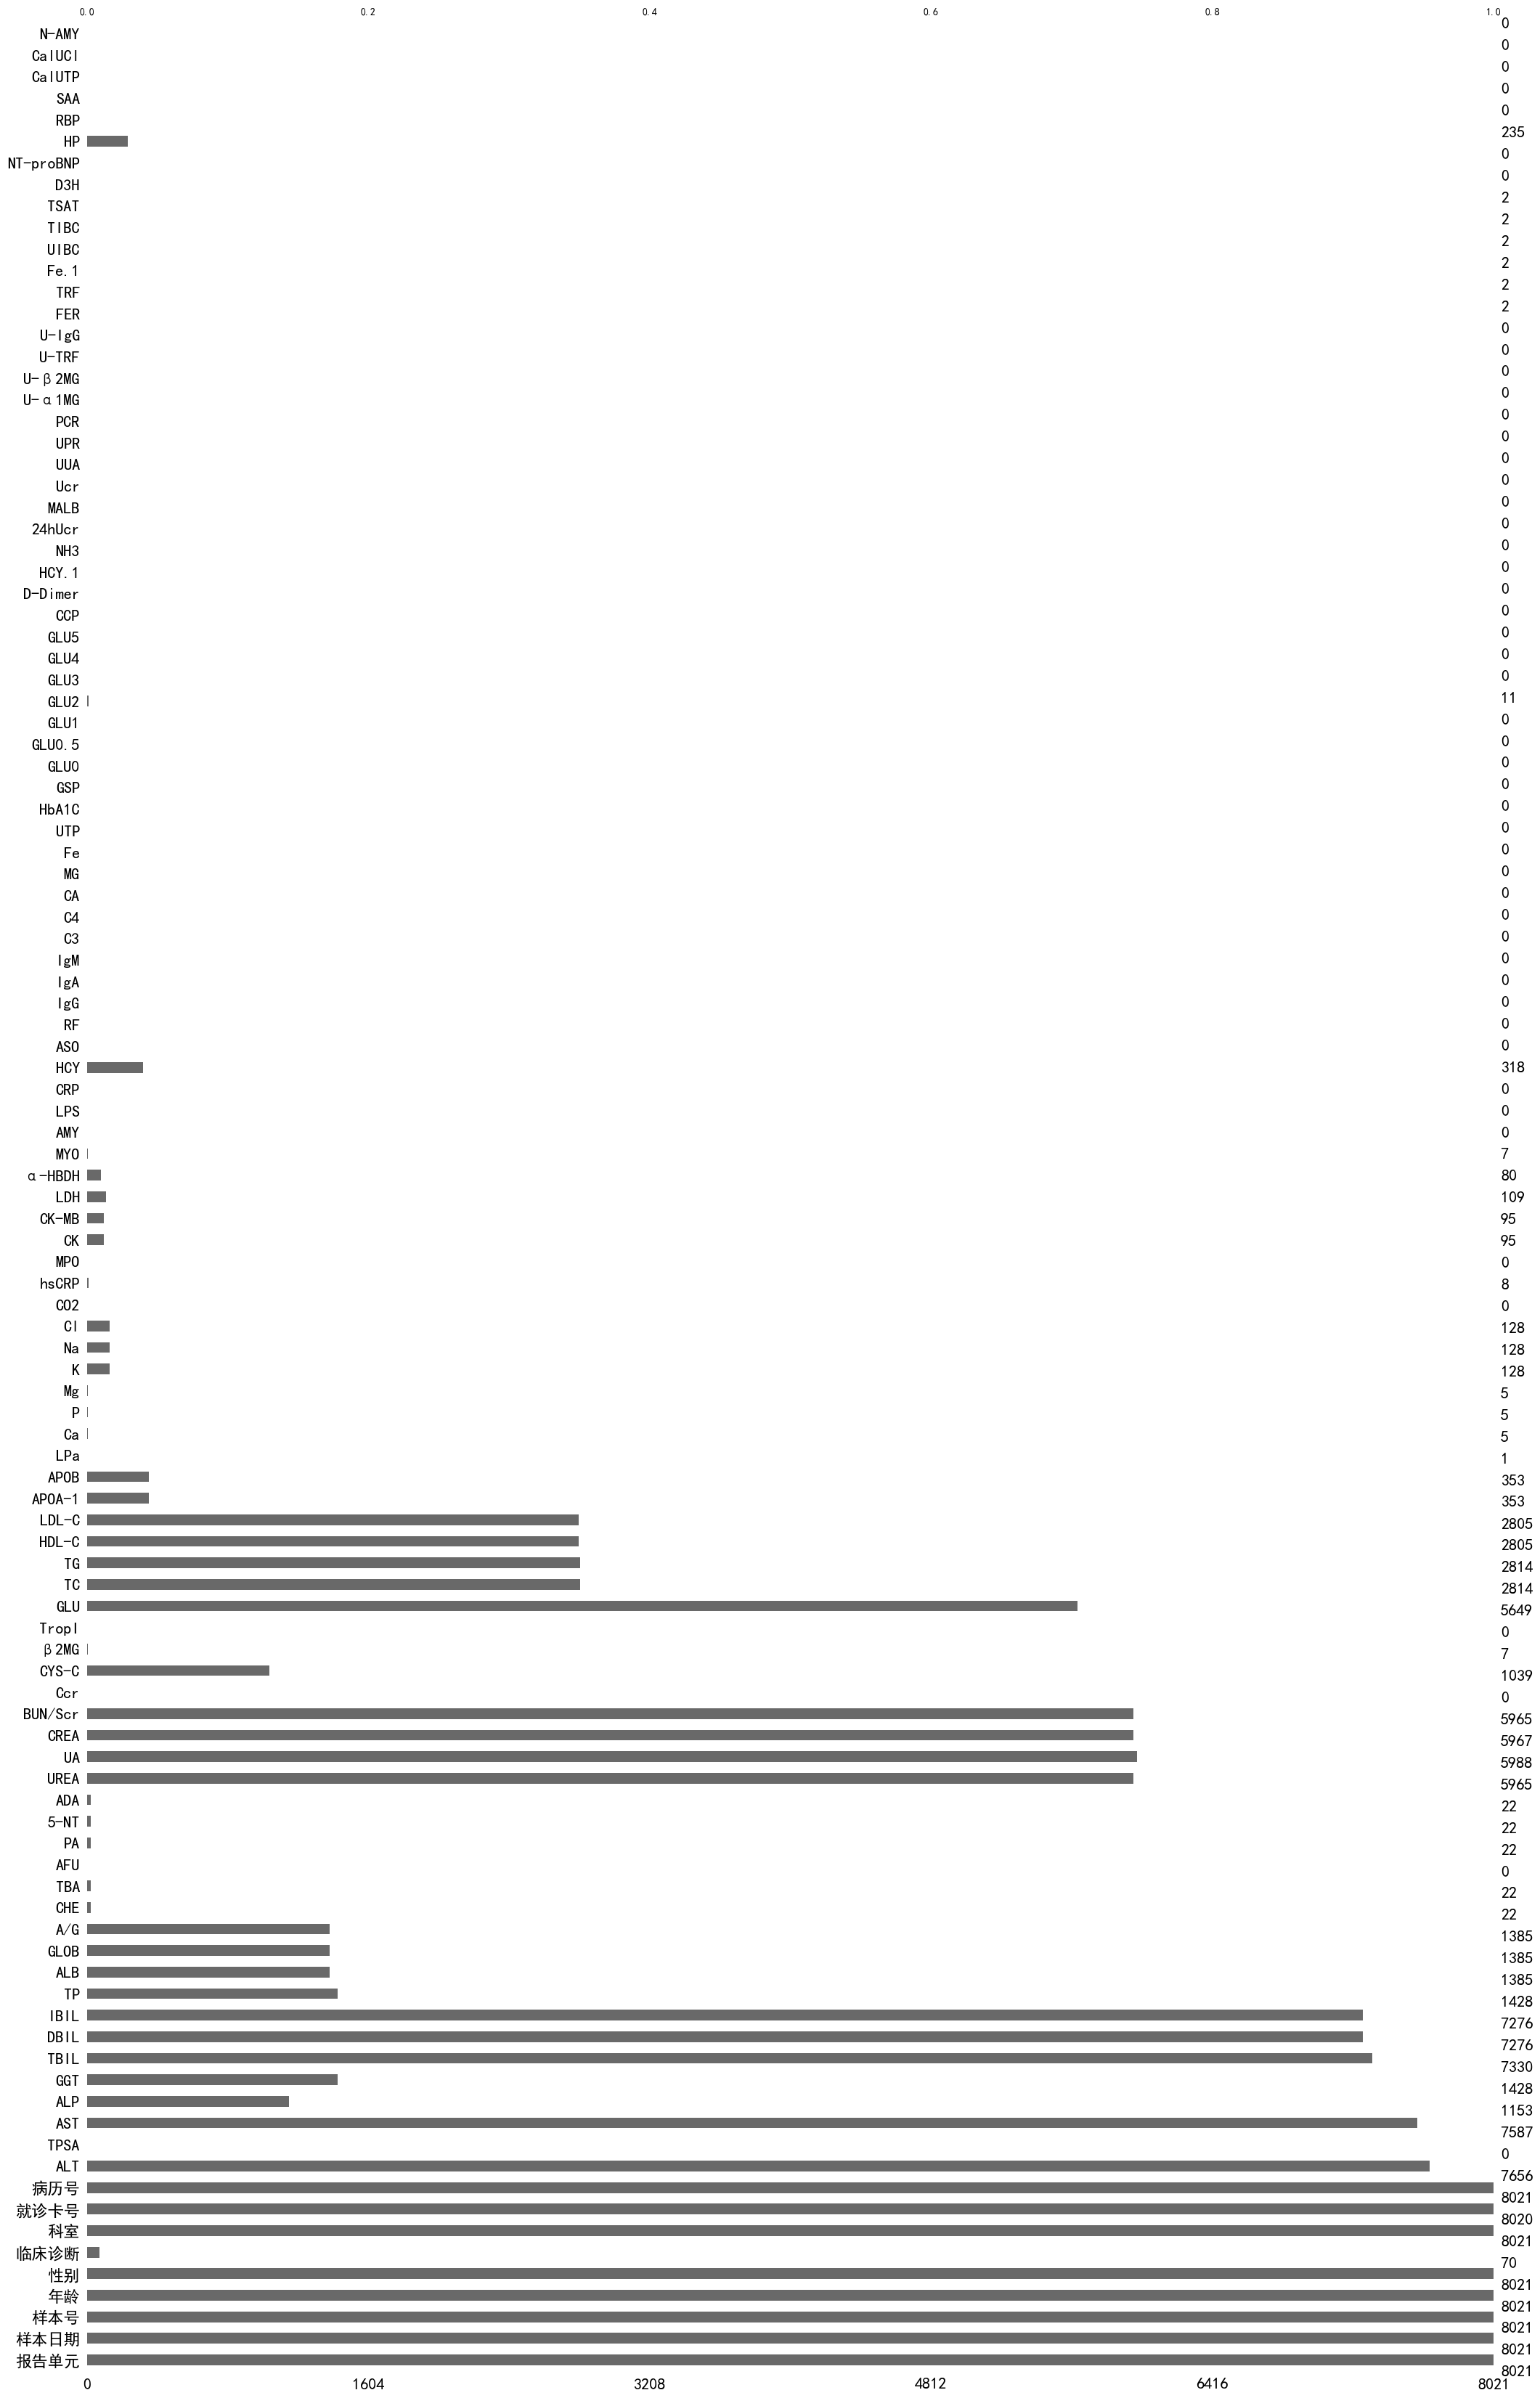

In [6]:
# 可视化缺失值
msno.bar(df1)
plt.show()

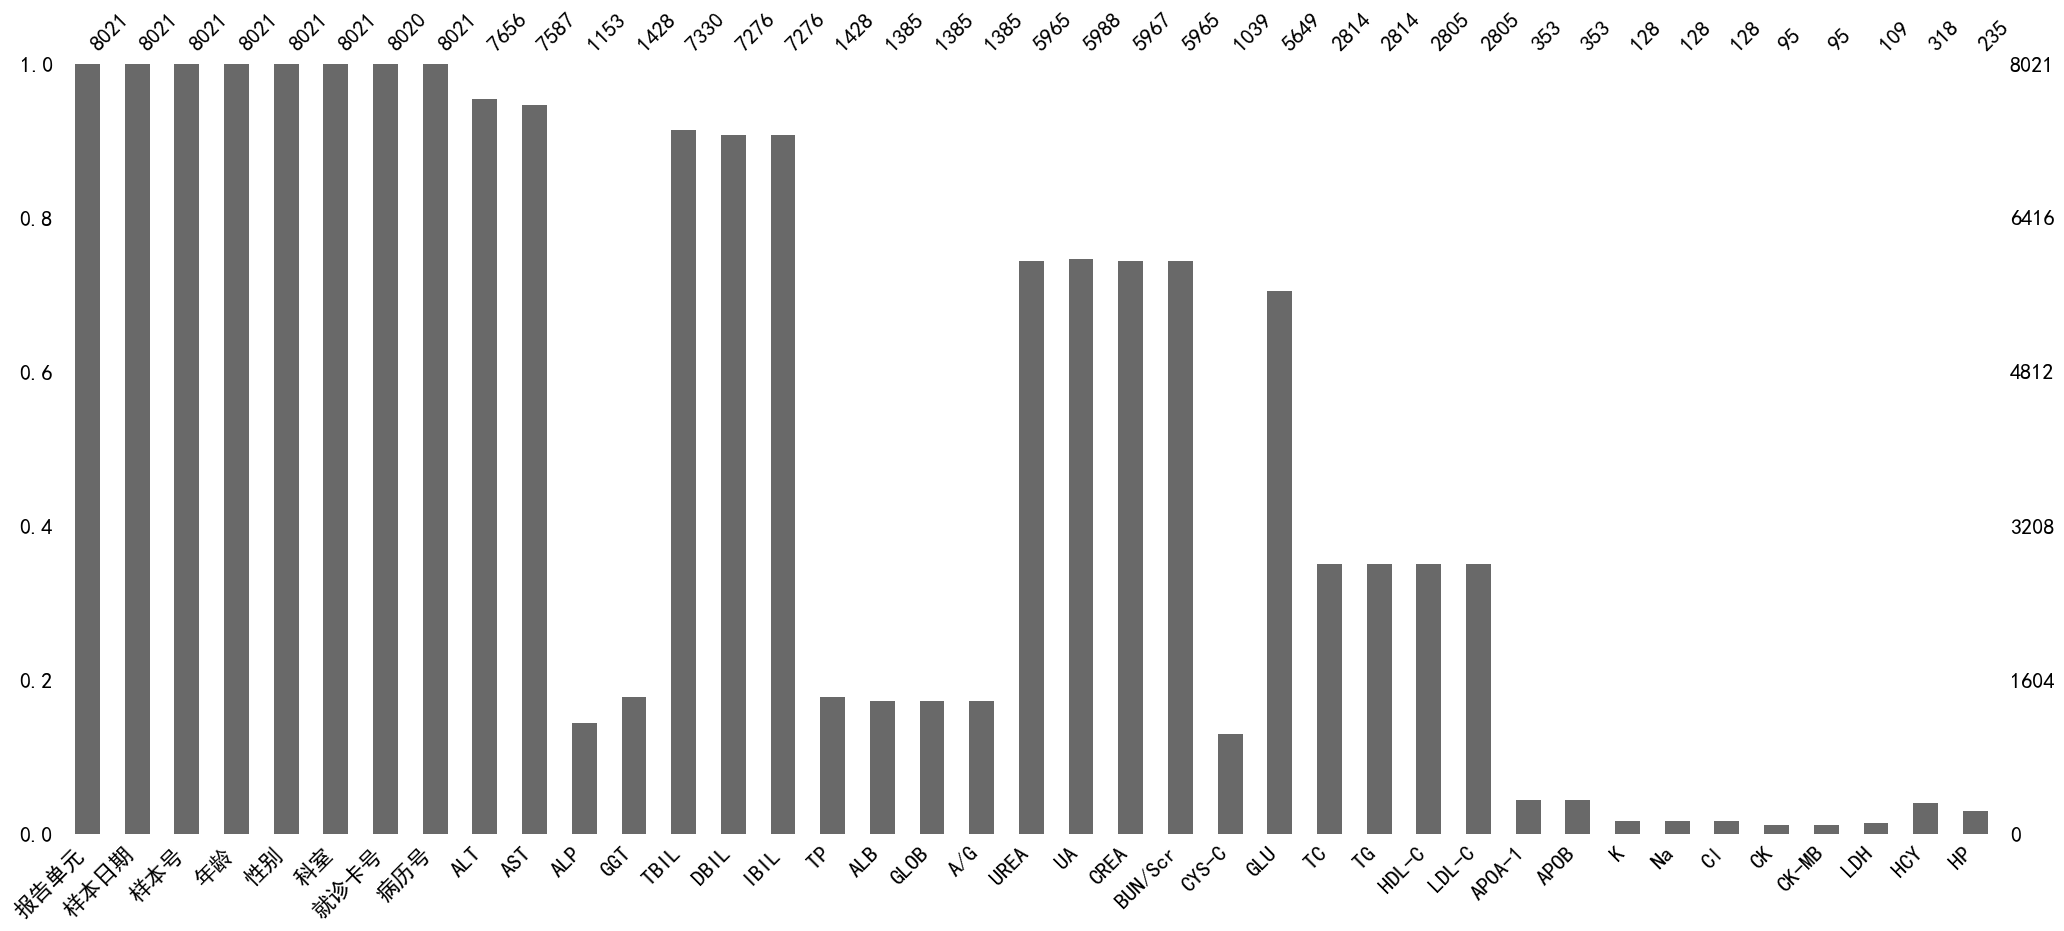

['报告单元', '样本日期', '样本号', '年龄', '性别', '科室', '就诊卡号', '病历号', 'ALT', 'AST', 'ALP', 'GGT', 'TBIL', 'DBIL', 'IBIL', 'TP', 'ALB', 'GLOB', 'A/G', 'UREA', 'UA', 'CREA', 'BUN/Scr', 'CYS-C', 'GLU', 'TC', 'TG', 'HDL-C', 'LDL-C', 'APOA-1', 'APOB', 'K', 'Na', 'Cl', 'CK', 'CK-MB', 'LDH', 'HCY', 'HP']


In [7]:
# 计算每列NaN的数量
nan_count_per_column = df1.isnull().sum()

# 获取DataFrame的总行数
total_rows = df1.shape[0]

# 计算每列NaN的占比
nan_percentage = (nan_count_per_column / total_rows) * 100

# 找出占比大于或等于99%的列名
columns_to_drop = nan_percentage[nan_percentage >= 99].index.tolist()

# 删除这些列
df1_cleaned = df1.drop(columns=columns_to_drop)

# 显示清洗后的DataFrame

# 可视化缺失值
msno.bar(df1_cleaned)
plt.show()


exist1= nan_percentage[nan_percentage <99].index.tolist()
print(exist1)

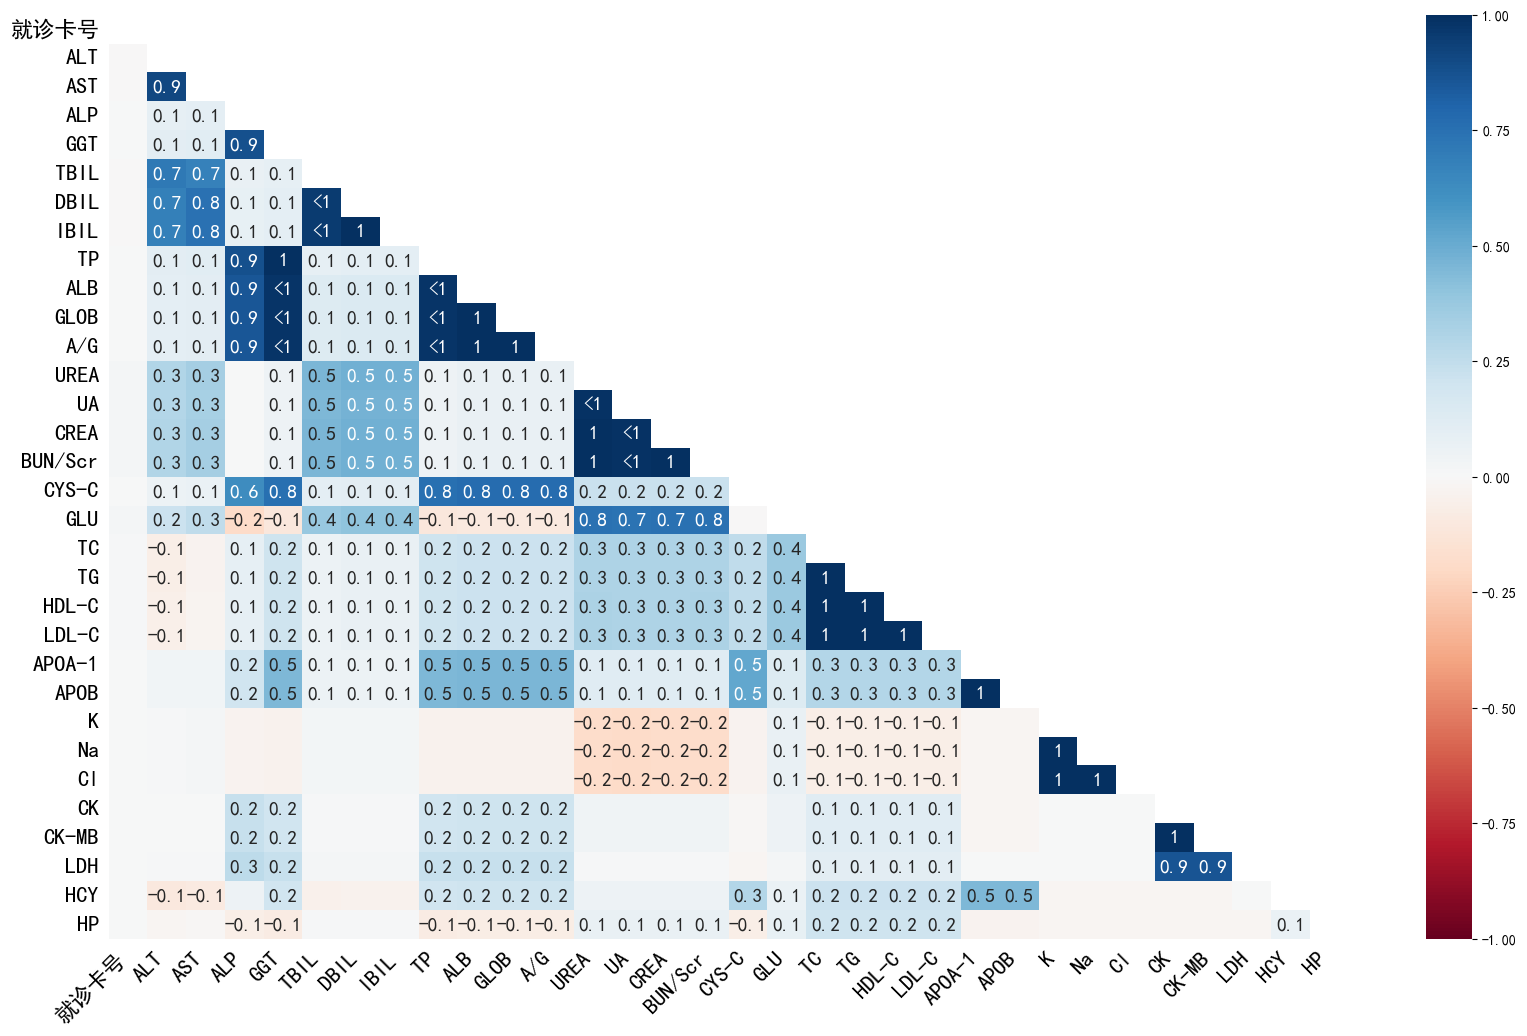

In [8]:
# 可视化缺失值
msno.heatmap(df1_cleaned)
plt.show()

In [9]:
#缺失值探索
df2.isnull().sum()

报告单元            0
样本日期            0
样本号             0
年龄              0
性别              0
             ... 
NT-proBNP    2178
RBP          2179
SAA          2179
HP           2179
CalUCl       2179
Length: 109, dtype: int64

In [10]:
#计算缺失值占百分比
miss_value=((df2.isnull().sum())/len(df2))*100
print(miss_value.round(2))

报告单元           0.00
样本日期           0.00
样本号            0.00
年龄             0.00
性别             0.00
              ...  
NT-proBNP     99.95
RBP          100.00
SAA          100.00
HP           100.00
CalUCl       100.00
Length: 109, dtype: float64


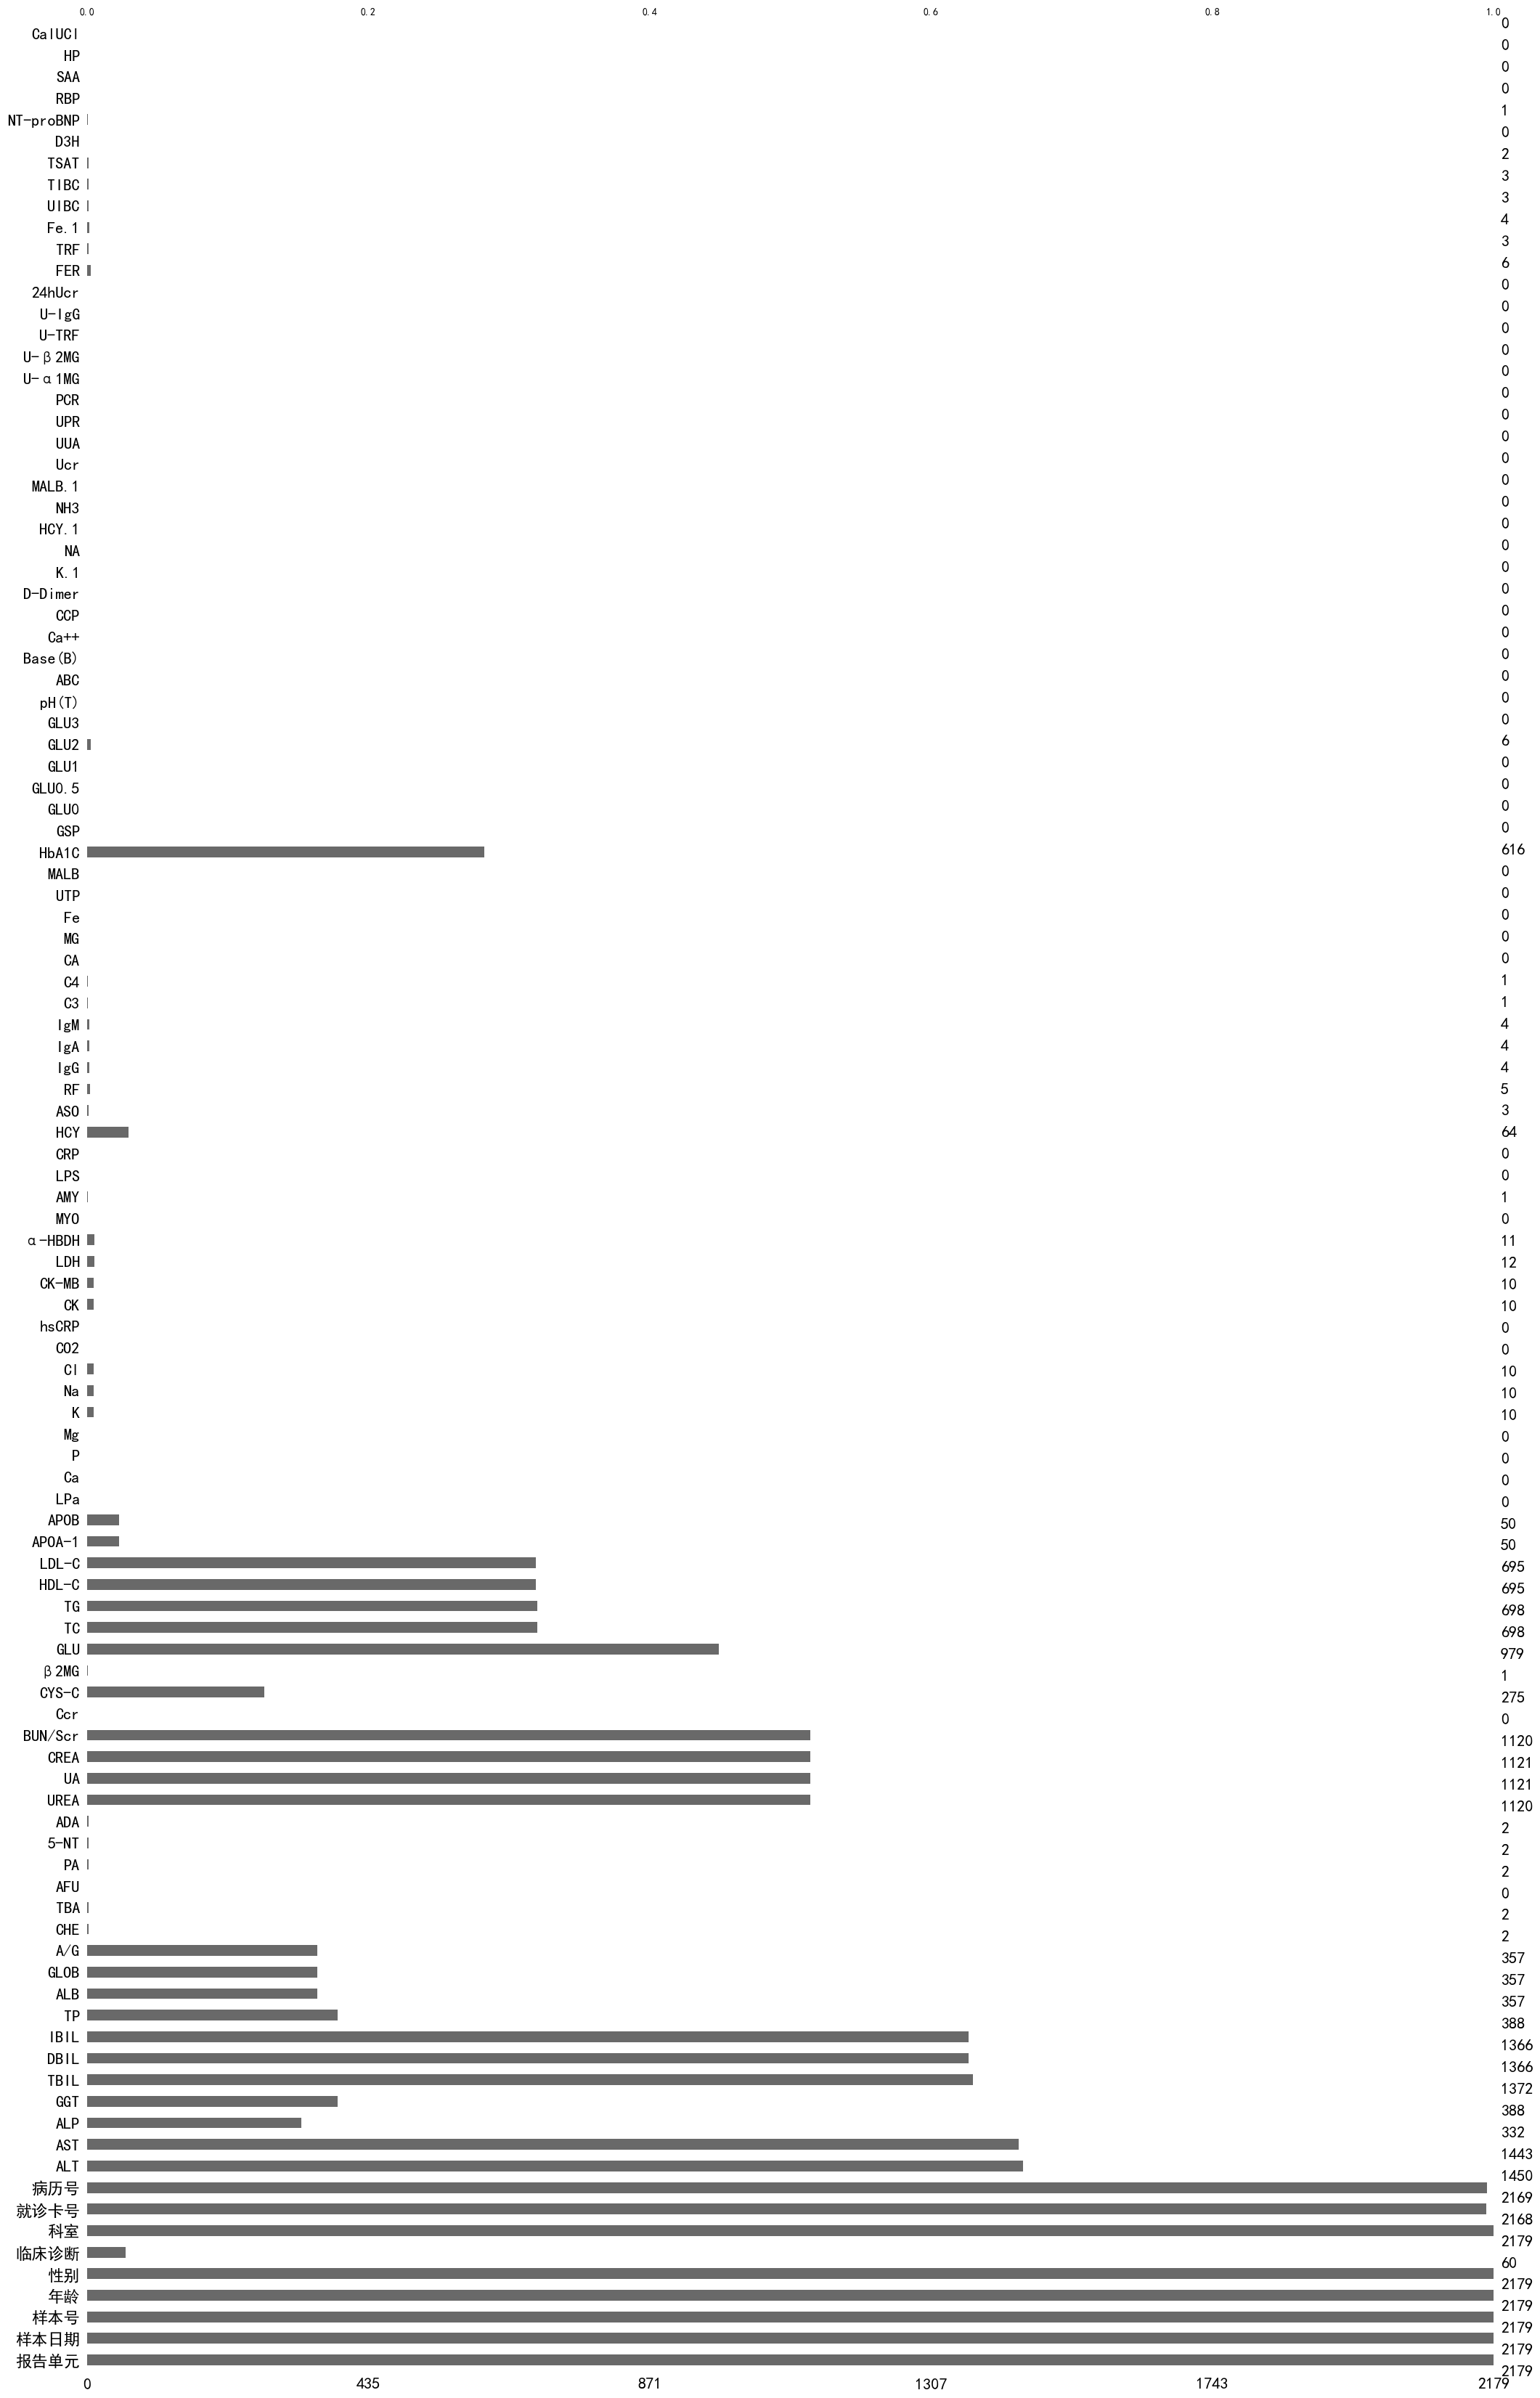

In [11]:
# 可视化缺失值
msno.bar(df2)
plt.show()

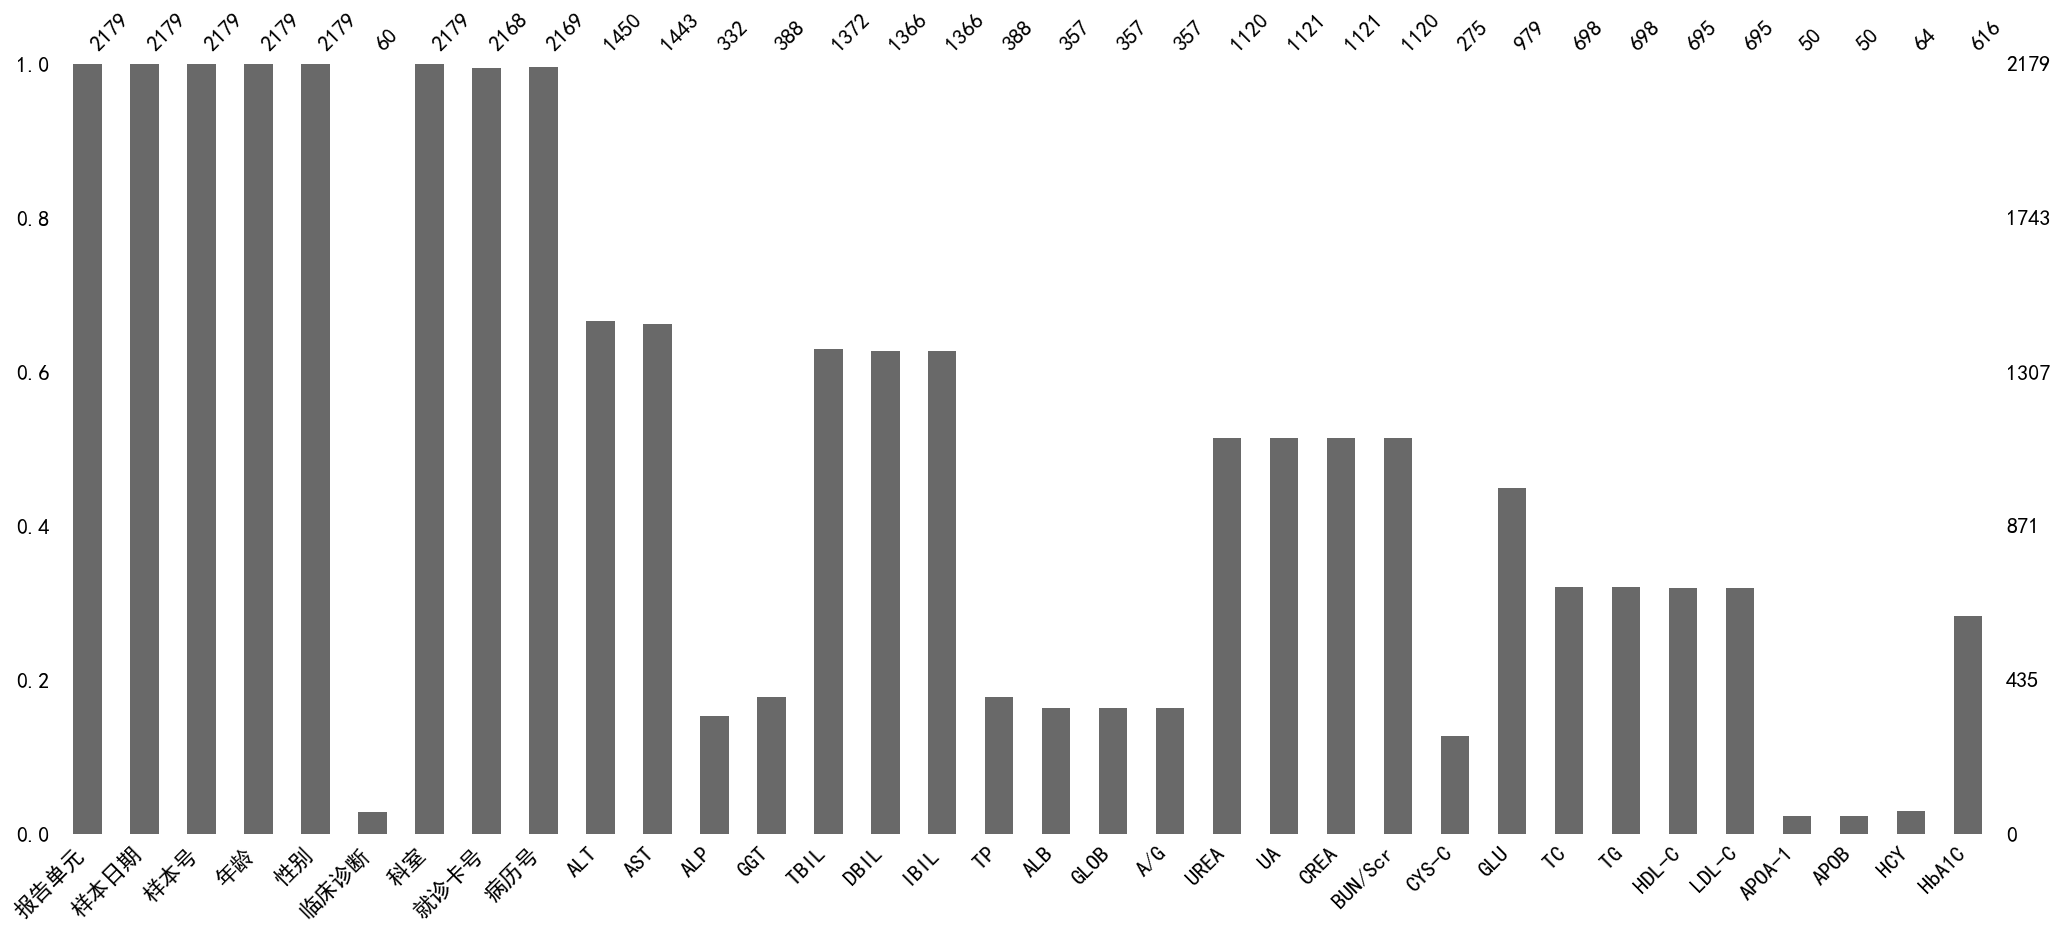

['报告单元', '样本日期', '样本号', '年龄', '性别', '临床诊断', '科室', '就诊卡号', '病历号', 'ALT', 'AST', 'ALP', 'GGT', 'TBIL', 'DBIL', 'IBIL', 'TP', 'ALB', 'GLOB', 'A/G', 'UREA', 'UA', 'CREA', 'BUN/Scr', 'CYS-C', 'GLU', 'TC', 'TG', 'HDL-C', 'LDL-C', 'APOA-1', 'APOB', 'HCY', 'HbA1C']


In [12]:
# 计算每列NaN的数量
nan_count_per_column = df2.isnull().sum()

# 获取DataFrame的总行数
total_rows = df2.shape[0]

# 计算每列NaN的占比
nan_percentage = (nan_count_per_column / total_rows) * 100

# 找出占比大于或等于99%的列名
columns_to_drop = nan_percentage[nan_percentage >= 99].index.tolist()

# 删除这些列
df2_cleaned = df2.drop(columns=columns_to_drop)

# 显示清洗后的DataFrame

# 可视化缺失值
msno.bar(df2_cleaned)
plt.show()


exist1= nan_percentage[nan_percentage <99].index.tolist()
print(exist1)

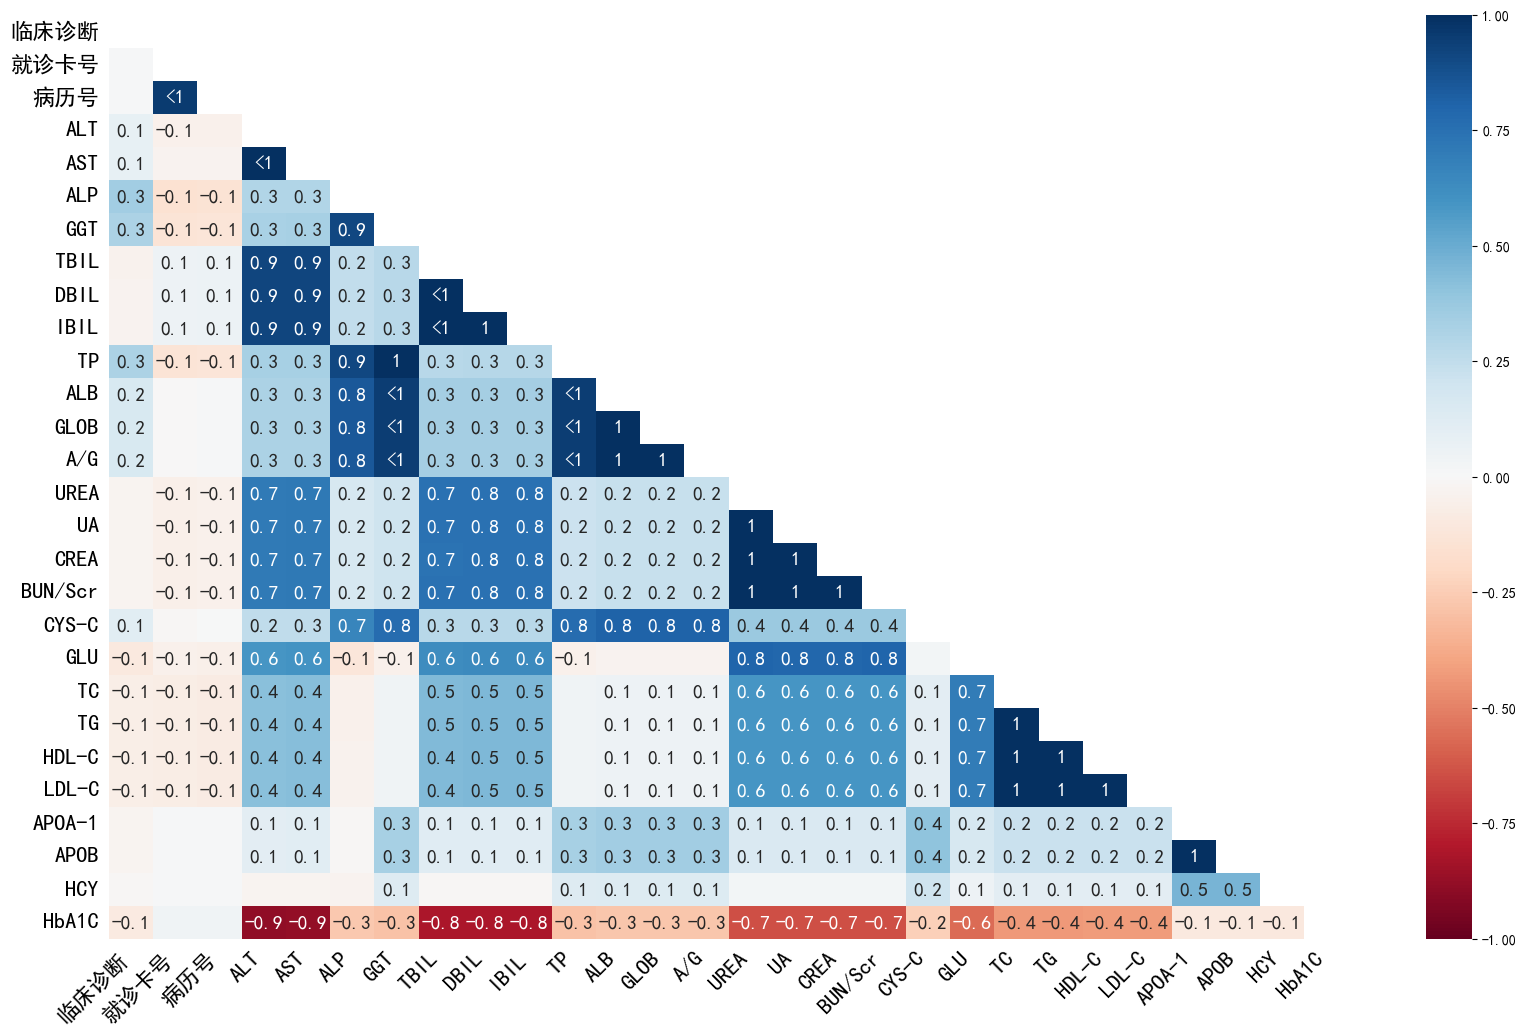

In [13]:
# 可视化缺失值
msno.heatmap(df2_cleaned)
plt.show()

df1
'报告单元', '样本日期', '样本号', '年龄', '性别', '科室', '就诊卡号', '病历号', 'ALT', 'AST', 'ALP', 'GGT', 'TBIL', 'DBIL', 'IBIL', 'TP', 'ALB', 'GLOB', 'A/G', 'UREA', 'UA', 'CREA', 'BUN/Scr', 'CYS-C', 'GLU', 'TC', 'TG', 'HDL-C', 'LDL-C', 'APOA-1', 'APOB',
'K', 'Na', 'Cl', 'CK', 'CK-MB', 'LDH',
'HCY',



df2
'报告单元', '样本日期', '样本号', '年龄', '性别',  '科室', '就诊卡号', '病历号', 'ALT', 'AST', 'ALP', 'GGT', 'TBIL', 'DBIL', 'IBIL','TP', 'ALB', 'GLOB', 'A/G', 'UREA', 'UA', 'CREA', 'BUN/Scr', 'CYS-C', 'GLU', 'TC', 'TG', 'HDL-C', 'LDL-C', 'APOA-1', 'APOB', 
'HCY', 'HbA1C'

df2比df1多了临床诊断60个,可以删掉。‘HbA1C’有616个不能删掉
df1多了‘HP’235个，但是AD患病没有这个特征要删掉
df1还多了'K', 'Na', 'Cl', 'CK', 'CK-MB', 'LDH',但AD患者也有还要保留

In [21]:
#df2_cleaned1=df2_cleaned.drop(columns="临床诊断")
df1_cleaned1=df1_cleaned.drop(columns="HP")

In [22]:
# 查看数据总体概况
df1_cleaned1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8021 entries, 0 to 8020
Data columns (total 38 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   报告单元     8021 non-null   object 
 1   样本日期     8021 non-null   object 
 2   样本号      8021 non-null   int64  
 3   年龄       8021 non-null   object 
 4   性别       8021 non-null   object 
 5   科室       8021 non-null   object 
 6   就诊卡号     8020 non-null   object 
 7   病历号      8021 non-null   object 
 8   ALT      7656 non-null   float64
 9   AST      7587 non-null   float64
 10  ALP      1153 non-null   float64
 11  GGT      1428 non-null   float64
 12  TBIL     7330 non-null   float64
 13  DBIL     7276 non-null   float64
 14  IBIL     7276 non-null   float64
 15  TP       1428 non-null   float64
 16  ALB      1385 non-null   float64
 17  GLOB     1385 non-null   float64
 18  A/G      1385 non-null   float64
 19  UREA     5965 non-null   float64
 20  UA       5988 non-null   float64
 21  CREA     5967 

In [31]:
# 查看数据总体概况
df2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2179 entries, 0 to 2178
Data columns (total 34 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   报告单元     2179 non-null   object 
 1   样本日期     2179 non-null   object 
 2   样本号      2179 non-null   int64  
 3   年龄       2179 non-null   object 
 4   性别       2179 non-null   object 
 5   临床诊断     60 non-null     object 
 6   科室       2179 non-null   object 
 7   就诊卡号     2168 non-null   object 
 8   病历号      2169 non-null   object 
 9   ALT      1450 non-null   float64
 10  AST      1443 non-null   float64
 11  ALP      332 non-null    float64
 12  GGT      388 non-null    float64
 13  TBIL     1372 non-null   float64
 14  DBIL     1366 non-null   float64
 15  IBIL     1366 non-null   float64
 16  TP       388 non-null    float64
 17  ALB      357 non-null    float64
 18  GLOB     357 non-null    float64
 19  A/G      357 non-null    float64
 20  UREA     1120 non-null   float64
 21  UA       1121 

In [37]:
df1_cleaned1_columns = ['报告单元', '样本日期', '样本号', '年龄', '性别','科室', '就诊卡号', 
               '病历号', 'ALT', 'AST', 'ALP', 'GGT', 'TBIL', 'DBIL', 'IBIL', 'TP', 'ALB', 'GLOB', 
               'A/G', 'UREA', 'UA', 'CREA', 'BUN/Scr', 'CYS-C', 'GLU', 'TC', 'TG', 'HDL-C', 'LDL-C', 
               'APOA-1', 'APOB', 'K', 'Na', 'Cl', 'CK', 'CK-MB', 'LDH', 'HCY']
df2_cleaned_columns = ['报告单元', '样本日期', '样本号', '年龄', '性别','临床诊断','科室', '就诊卡号', 
               '病历号', 'ALT', 'AST', 'ALP', 'GGT', 'TBIL', 'DBIL', 'IBIL', 'TP', 'ALB', 'GLOB', 
               'A/G', 'UREA', 'UA', 'CREA', 'BUN/Scr', 'CYS-C', 'GLU', 'TC', 'TG', 'HDL-C', 'LDL-C', 
               'APOA-1', 'APOB', 'HCY', 'HbA1C']

# 这里我们创建两个空的DataFrame来模拟
#df1 = pd.DataFrame(columns=df1_columns)
#df2 = pd.DataFrame(columns=df2_columns)

# 使用merge函数进行合并，how参数设置为'outer'可以实现行合，并且保留所有变量
data = pd.merge(df1_cleaned1, df2_cleaned, on=['报告单元', '样本日期', '样本号', '年龄', '性别', '科室', '就诊卡号', '病历号',
                                                'ALT', 'AST', 'ALP', 'GGT', 'TBIL', 'DBIL', 'IBIL','TP', 'ALB', 'GLOB', 'A/G', 
                                                'UREA', 'UA', 'CREA', 'BUN/Scr', 'CYS-C', 'GLU', 'TC', 'TG', 'HDL-C', 'LDL-C',
                                                'APOA-1', 'APOB','HCY' ],how='outer')

# 由于我们希望保留所有的变量，不需要额外的步骤来处理空值，因为merge函数会自动填充缺失值为NaN

print(data)

          报告单元        样本日期      样本号      年龄 性别    科室                就诊卡号  \
0       生化·流水线  2022/11/29  9999999   32岁8月  男  体检中心            90000136   
1       生化·流水线  2023/01/15      500   31岁9月  男  体检中心            90000160   
2       生化·流水线  2023/02/02      837  48岁10月  女  体检中心  522423197403171528   
3       生化·流水线  2023/02/02      840  49岁11月  女  体检中心  520112197302192226   
4       生化·流水线  2023/02/02      854   60岁6月  男  体检中心  522225196207086614   
...        ...         ...      ...     ... ..   ...                 ...   
10195  生化·综合项目  2024/08/02      121   15岁7月  女  体检中心          0000016359   
10196  生化·综合项目  2024/08/04       45   15岁7月  男  体检中心          0000016467   
10197  生化·综合项目  2024/08/04       46  15岁10月  男  体检中心          0000016474   
10198  生化·综合项目  2024/08/04       47     15岁  女  体检中心          0000016466   
10199  生化·综合项目  2024/08/06       93  58岁10月  女  体检中心          0000016561   

                      病历号    ALT   AST  ...  APOB   K  Na  Cl  CK  CK-MB  LDH  \
0     

In [38]:
data.head()

,报告单元,样本日期,样本号,年龄,性别,科室,就诊卡号,病历号,ALT,AST,...,APOB,K,Na,Cl,CK,CK-MB,LDH,HCY,临床诊断,HbA1C
0,生化·流水线,2022/11/29,9999999,32岁8月,男,体检中心,90000136,90000136,157.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,生化·流水线,2023/01/15,500,31岁9月,男,体检中心,90000160,90000160,10.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,生化·流水线,2023/02/02,837,48岁10月,女,体检中心,522423197403171528,522423197403171528,11.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,生化·流水线,2023/02/02,840,49岁11月,女,体检中心,520112197302192226,520112197302192226,31.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,生化·流水线,2023/02/02,854,60岁6月,男,体检中心,522225196207086614,522225196207086614,21.0,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
#data.to_csv('normal_merged.csv', index=False)

In [41]:
data.isnull().sum()

报告单元           0
样本日期           0
样本号            0
年龄             0
性别             0
科室             0
就诊卡号          12
病历号           10
ALT         1094
AST         1170
ALP         8715
GGT         8384
TBIL        1498
DBIL        1558
IBIL        1558
TP          8384
ALB         8458
GLOB        8458
A/G         8458
UREA        3115
UA          3091
CREA        3112
BUN/Scr     3115
CYS-C       8886
GLU         3572
TC          6688
TG          6688
HDL-C       6700
LDL-C       6700
APOA-1      9797
APOB        9797
K          10072
Na         10072
Cl         10072
CK         10105
CK-MB      10105
LDH        10091
HCY         9818
临床诊断       10140
HbA1C       9584
dtype: int64

In [43]:
#计算缺失值占百分比
miss_value=((data.isnull().sum())/len(data))*100
print(miss_value.round(2))

报告单元        0.00
样本日期        0.00
样本号         0.00
年龄          0.00
性别          0.00
科室          0.00
就诊卡号        0.12
病历号         0.10
ALT        10.73
AST        11.47
ALP        85.44
GGT        82.20
TBIL       14.69
DBIL       15.27
IBIL       15.27
TP         82.20
ALB        82.92
GLOB       82.92
A/G        82.92
UREA       30.54
UA         30.30
CREA       30.51
BUN/Scr    30.54
CYS-C      87.12
GLU        35.02
TC         65.57
TG         65.57
HDL-C      65.69
LDL-C      65.69
APOA-1     96.05
APOB       96.05
K          98.75
Na         98.75
Cl         98.75
CK         99.07
CK-MB      99.07
LDH        98.93
HCY        96.25
临床诊断       99.41
HbA1C      93.96
dtype: float64
